# Goals
- Measure students' performance based on their hours studied, previous scores, participation in extracurricular activities, sleep hours, and the number of sample question papers practiced.

In [1]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

# Problem Statement

We aim to provide insights into the relationship between the predictor variables and the performance index. We will  use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

### Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.
### Target Variable:
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The training data is from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression).

In [16]:
# Read the CSV file
f = pd.read_csv('data/train_multi.csv')

In [3]:
print(f.columns)
f.isnull().sum()

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
f.duplicated().sum()

0

In [5]:
# Separate the independent variables (features)
X_train = np.array(f[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
# Separate the dependent variable (target)
y_train = np.array(f['Performance Index'])

In [6]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (156, 4), X Type:<class 'numpy.ndarray'>)
y Shape: (156,), y Type:<class 'numpy.ndarray'>)


In [7]:
# initialize parameters
b_init = 0
w_init = np.array([ 0, 0, 0, 0])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'int'>


#  Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`


In [8]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p 

# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is: 
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$

In [9]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for multiple linear regression
    Args:
        x (ndarray (m,n)) : features
        y (ndarray (m,)) : targets
        w (ndarray (n,)) : model parameters( weights )
        b (scalar)       : model parameter( bias )
    returns : 
        cost (float ) : the cost for the current model
    """
    m = X.shape[0]
    j_wb = 0
    for i in range(m):
        j_wb += ((np.dot(w,X[i])+b) - y[i])**2
    j_wb/=2*m
    return j_wb

# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


## Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [10]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for multiple linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): the gradient of the cost according to w.
      dj_db (scalar):       the gradient of the cost according to b.
    """
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        error = (np.dot(w,X[i]) + b) - y[i] 
        for j in range(n):
            dj_dw[j] += np.clip(error * X[i][j], -1e10, 1e10)

        dj_db += np.clip(error, -1e10, 1e10)
    dj_dw /=m
    dj_db /=m
    return dj_dw,dj_db

##  Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [11]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters gradient steps with learning rate alpha
    
    Args:
        X (ndarray (m,n))   : features
        y (ndarray (m,))    : targets
        w_in (ndarray (n,)) : initial model parameters  
        b_in (scalar)       : initial model parameter
        alpha (float)       : Learning rate ( between 0 and 1 )
        num_iters (int)     : number of iterations to run gradient descent
        cost_function       : function to call to produce cost
        gradient_function   : function to call to produce gradient
      
    Returns:
        w (ndarray (n,))   : Updated values of parameters 
        b (scalar)         : Updated value of parameter 
        history (List)     : History of cost values
      """
    
    # An array to store cost J and w's at each iteration 
    cost_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters) :
        dj_w, dj_b = gradient_function(X, y, w, b)
        
        # update the parameters
        w = w - alpha*dj_w
        b = b - alpha*dj_b
    
        # Save the cost and the new values of the parameters
        if(i<100000):
            cost_history.append(cost_function(X, y, w, b))
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:8.2f}")
    return w, b, cost_history
        

In [12]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 100000
alpha = 3.0e-4
# run gradient descent 
w_final, b_final, cost_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                               alpha, iterations, compute_cost, compute_gradient, )
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
# for i in range(m):
#     print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost   698.11
Iteration 10000: Cost    14.78
Iteration 20000: Cost    12.95
Iteration 30000: Cost    11.37
Iteration 40000: Cost    10.02
Iteration 50000: Cost     8.86
Iteration 60000: Cost     7.86
Iteration 70000: Cost     7.01
Iteration 80000: Cost     6.27
Iteration 90000: Cost     5.64
b,w found by gradient descent: -18.40,[ 2.62  0.92 -0.43 -0.03] 


# Model Evaluation

In [13]:
y_hat = np.zeros((m,))
for i in range(m):
    y_hat[i] = np.dot(X_train[i],w_final) + b_final
    print(f"actual value = {y_train[i]}     - predicted value = {y_hat[i]}")


actual value = 91.0     - predicted value = 86.89897612341582
actual value = 65.0     - predicted value = 65.54295898646865
actual value = 45.0     - predicted value = 46.318863721052594
actual value = 36.0     - predicted value = 40.21960881959204
actual value = 66.0     - predicted value = 65.18937690096249
actual value = 61.0     - predicted value = 56.98405800169718
actual value = 63.0     - predicted value = 64.60961266574829
actual value = 42.0     - predicted value = 41.97789530005559
actual value = 61.0     - predicted value = 61.866906118292945
actual value = 69.0     - predicted value = 72.02544873539765
actual value = 84.0     - predicted value = 84.20491611274375
actual value = 73.0     - predicted value = 72.43211424710427
actual value = 27.0     - predicted value = 28.669980623788945
actual value = 33.0     - predicted value = 38.68607607929097
actual value = 68.0     - predicted value = 63.946125522472514
actual value = 43.0     - predicted value = 51.09013345597518
actu

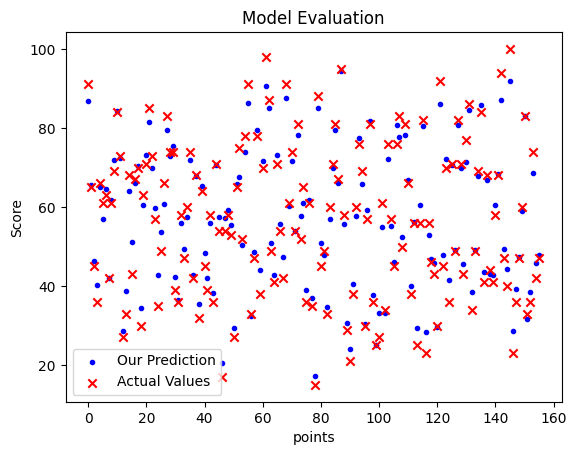

In [14]:
pts = np.arange(m)
# Plot our model prediction
plt.scatter(pts, y_hat, marker='.', c='b',label='Our Prediction')
# Plot the data points
plt.scatter(pts, y_train, marker='x', c='r',label='Actual Values')
# Set the title
plt.title("Model Evaluation")
# Set the y-axis label
plt.ylabel('Score')
# Set the x-axis label
plt.xlabel('points')
plt.legend()
plt.show()

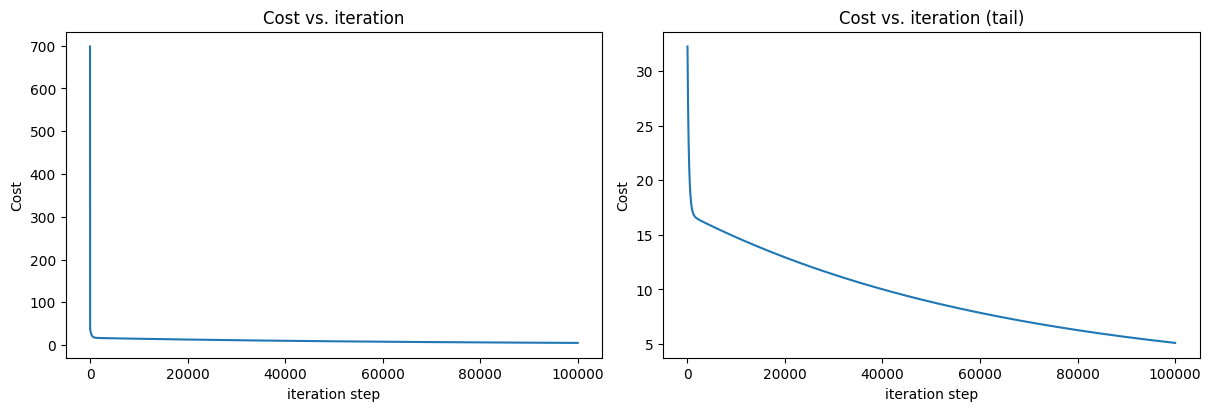

In [15]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_hist)
ax2.plot(100 + np.arange(len(cost_hist[100:])), cost_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()